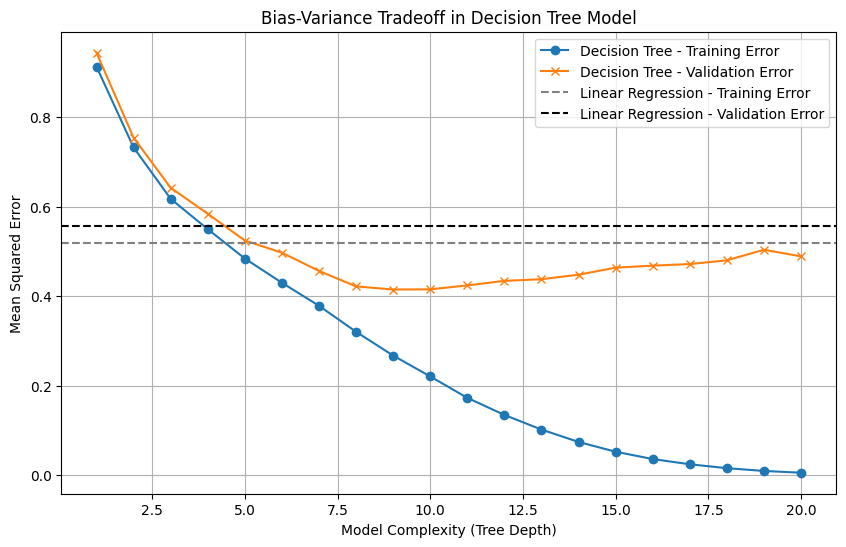

In [1]:
## All the necessary steps required to be performed on dataset before feed the model are not applied. 
## This is only for demonstration purpose. 
## The performance can be improved by following those steps 
## Feature Engineering can further improve the performance. Think what new features can be constructed.
#  
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Attempt to load the California housing dataset again
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize arrays to store training and validation errors for different model complexities
train_errors_bias_variance = []
val_errors_bias_variance = []
depth_range = range(1, 21)  # Varying tree depths for Decision Tree

# Loop over different model complexities (tree depth)
for depth in depth_range:
    # Create a decision tree model with increasing depth (complexity)
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Calculate mean squared error for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_errors_bias_variance.append(mean_squared_error(y_train, y_train_pred))
    val_errors_bias_variance.append(mean_squared_error(y_val, y_val_pred))

# Also add a simple linear regression model as a baseline (low complexity, high bias)
linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train, y_train)
y_train_pred_lr = linear_model.predict(X_train)
y_val_pred_lr = linear_model.predict(X_val)

# Linear model errors
train_error_lr = mean_squared_error(y_train, y_train_pred_lr)
val_error_lr = mean_squared_error(y_val, y_val_pred_lr)

# Plotting bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors_bias_variance, label="Decision Tree - Training Error", marker='o')
plt.plot(depth_range, val_errors_bias_variance, label="Decision Tree - Validation Error", marker='x')
plt.axhline(y=train_error_lr, color='gray', linestyle='--', label="Linear Regression - Training Error")
plt.axhline(y=val_error_lr, color='black', linestyle='--', label="Linear Regression - Validation Error")
plt.xlabel("Model Complexity (Tree Depth)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff in Decision Tree Model")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd 
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['Target'] = housing.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
